# Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

## Dataset Description

In [2]:
breast_cancer = pd.read_csv("breast-cancer_csv.csv")
breast_cancer

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


In [3]:
breast_cancer.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')

In [4]:
breast_cancer.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [6]:
breast_cancer.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

### Only one row contains Null value on the `breast-quad` column, we can drop it

In [7]:
breast_cancer.dropna(inplace=True)

In [8]:
breast_cancer.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

<div class="alert alert-block alert-danger"> 
    
1. Plot the distribution of samples according to their classes. What do you observe? 
2. Code from scratch a mixed version of naive Bayes.
3. Verify if the dataset respects some related hypothesis to the following ML algorithms (such as Gaussian distribution and independency between features for naive Bayes, Linear Separability for Logistic regression..
....)  
4. Train the implemented mixed naive Bayes, SVM, KNN, Logistic regression, and Decision Tree (from
    sklearn) on all the breast cancer dataset.
5. Plot the graph of convergence of Logistic regression. 
6. Display, export, and import the generated models.
7. Evaluate the performance of the generated models using the 5-cross-validation evaluation method and
    display the confusion matrix for each split. Display the mean of recall, precision, f1-score, and the ROC curves.
8. Which evaluation metric do you recommend using for this dataset: unbalanced and medical?  
9. Import the best model according to the chosen metric and its pre-processings and predict the class of the third simple using the best model models.

   
   
<div/>

In [12]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

X = breast_cancer.drop("Class", axis=1)
y = breast_cancer["Class"]

X = pd.get_dummies(X, drop_first=True)

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_scaled, y)


SVC(kernel='linear', random_state=42)

In [14]:
import joblib

print("SVM Classifier:")
print(svm_classifier)
joblib.dump(scaler,'scaler.joblib')
joblib.dump(le,'label_encoder.joblib')
# Exporting the Model
joblib.dump(svm_classifier, 'svm_model.joblib')

# Importing the Model
loaded_model = joblib.load('svm_model.joblib')

SVM Classifier:
SVC(kernel='linear', random_state=42)


Confusion Matrix - Split 1:
[[ 0  0  0]
 [36  0  3]
 [13  0  4]]

Confusion Matrix - Split 2:
[[ 0  0  0]
 [33  0  7]
 [ 8  0  8]]

Confusion Matrix - Split 3:
[[ 0  0  0]
 [32  0  7]
 [11  0  5]]

Confusion Matrix - Split 4:
[[ 0  0  0]
 [35  0  4]
 [ 9  0  7]]

Confusion Matrix - Split 5:
[[ 0  0  0]
 [35  0  4]
 [11  0  5]]

Metrics for Class 0 - Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000

Metrics for Class 1 - Precision: 1.0000, Recall: 0.3580, F1-Score: 0.5273



C:\Users\Belmiloud Maroua\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


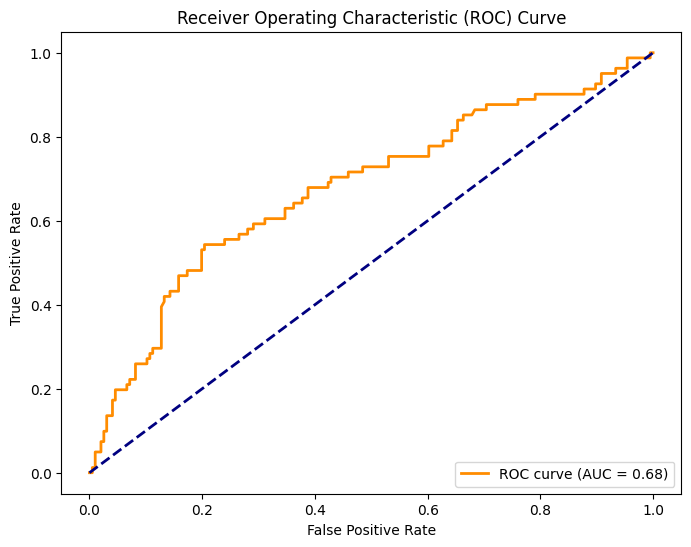

In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


# Initialize StratifiedKFold with 5 splits
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Get cross-validated predictions
y_pred_cv = cross_val_predict(svm_classifier, X, y, cv=cv, method='decision_function')

# Display confusion matrix for each split
for i, (train, test) in enumerate(cv.split(X, y)):
    cm = confusion_matrix(y[test], np.sign(y_pred_cv[test]))
    print(f"Confusion Matrix - Split {i+1}:\n{cm}\n")

# Calculate metrics for each class separately
for label in np.unique(y):
    indices = np.where(y == label)
    y_label = np.where(y_pred_cv[indices] > 0, 1, 0)  # Convert scores to binary predictions
    metrics = precision_recall_fscore_support(y[indices], y_label, average='binary')
    print(f"Metrics for Class {label} - Precision: {metrics[0]:.4f}, Recall: {metrics[1]:.4f}, F1-Score: {metrics[2]:.4f}\n")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, y_pred_cv)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
